Campo eletrico critico: 12158918.58705092
4.729815719174728e-14


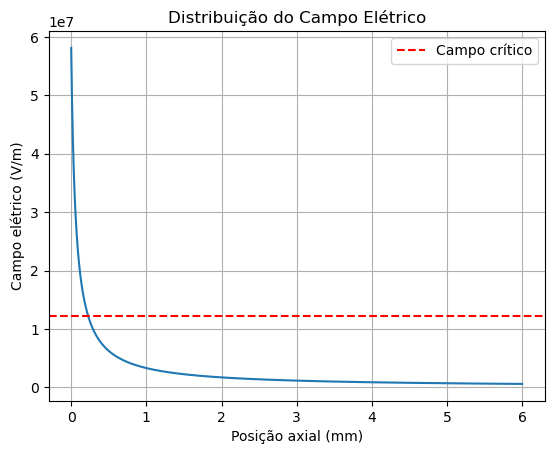

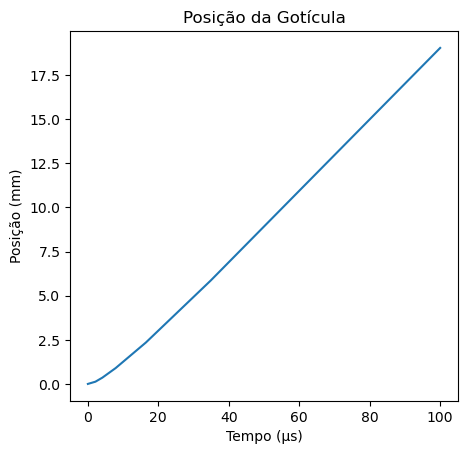

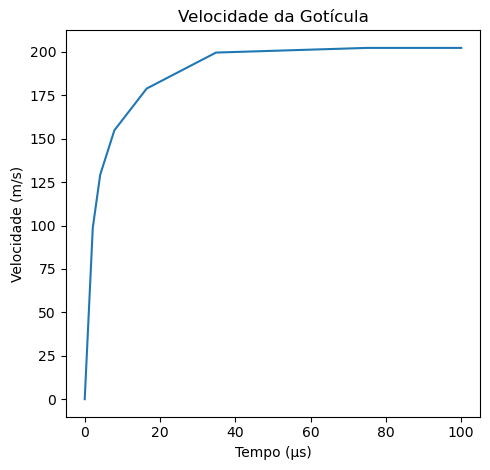

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi, epsilon_0
from scipy.integrate import solve_ivp

# Parâmetros
gamma = 0.05  # Tensão superficial (N/m)
epsilon_r = 84  # Permissividade relativa
d = 6e-3  # Distância capilar-eletrodo (m)
R = 0.12e-3 / 2  # Raio do capilar (m)
Rc = R  # Raio de curvatura igual ao capilar
rho = 1.13e3  # Densidade (kg/m^3)
Rg = 0.002e-3  # Raio da gotícula (m)

# Campo crítico e tensão crítica
En_critical = np.sqrt(pi * gamma / (2 * epsilon_0 * R))
V_critical = np.sqrt((gamma * Rc) / epsilon_0) * np.log(4 * d / Rc)

print("Campo eletrico critico:",En_critical)

# Campo elétrico ao longo do eixo
z = np.linspace(0, d, 5000)
E_field = V_critical / (z + Rc)

# Gráfico do campo elétrico
plt.figure()
plt.plot(z * 1e3, E_field)
plt.axhline(En_critical, color='red', linestyle='--', label="Campo crítico")
plt.xlabel("Posição axial (mm)")
plt.ylabel("Campo elétrico (V/m)")
plt.title("Distribuição do Campo Elétrico")
plt.legend()
plt.grid()
plt.savefig("electric_field_graph.png")

# Dinâmica da gotícula
m = (4 / 3) * pi * Rg**3 * rho
Q = 8 * pi * np.sqrt(epsilon_0 * gamma )* Rg**(3 / 2)
print(Q)

def electric_force(x):
    return Q * (V_critical / (x + Rc))

def droplet_dynamics(t, y):
    x, v = y
    Fe = electric_force(x) if x < d else 0
    a = Fe / m
    return [v, a]

t_span = (0, 0.1e-3)
y0 = [0, 0]
t_eval = np.linspace(*t_span, 500)
solution = solve_ivp(droplet_dynamics, t_span, y0)

x_pos = solution.y[0]
v_vel = solution.y[1]


# Gráficos de posição e velocidade
plt.figure().set_figwidth(5)
plt.plot(solution.t*1e6, x_pos * 1e3)
plt.xlabel("Tempo (μs)")
plt.ylabel("Posição (mm)")
plt.title("Posição da Gotícula")

plt.figure().set_figwidth(5)
plt.plot(solution.t*1e6, v_vel)
plt.xlabel("Tempo (μs)")
plt.ylabel("Velocidade (m/s)")
plt.title("Velocidade da Gotícula")

plt.tight_layout()
plt.savefig("droplet_graphs.png")
